In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [74]:
# Load dataset (Replace 'filename.csv' with your actual file)
df = pd.read_csv("C:/Users/ASWATHY/Downloads/Crime_Incidents_in_2024 (1).csv")


In [75]:
# Display basic info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29294 non-null  float64
 1   Y                     29294 non-null  float64
 2   CCN                   29294 non-null  int64  
 3   REPORT_DAT            29294 non-null  object 
 4   SHIFT                 29294 non-null  object 
 5   METHOD                29294 non-null  object 
 6   OFFENSE               29294 non-null  object 
 7   BLOCK                 29294 non-null  object 
 8   XBLOCK                29294 non-null  float64
 9   YBLOCK                29294 non-null  float64
 10  WARD                  29290 non-null  float64
 11  ANC                   29290 non-null  object 
 12  DISTRICT              28549 non-null  float64
 13  PSA                   28826 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29290 non-null  object 
 15

In [76]:
# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())



First 5 Rows of the Dataset:
             X            Y       CCN              REPORT_DAT     SHIFT  \
0  400040.6100  129046.4721  18060158  2024/07/30 04:00:00+00  MIDNIGHT   
1  397833.8700  138551.8900  23101994  2024/02/07 18:11:44+00       DAY   
2  397576.9900  143086.8500  20160181  2024/05/22 04:00:00+00  MIDNIGHT   
3  399337.0100  138221.0900  21151970  2024/06/20 04:00:00+00  MIDNIGHT   
4  400891.3397  131932.5347  22065374  2024/05/22 04:00:00+00  MIDNIGHT   

   METHOD       OFFENSE                                     BLOCK  \
0     GUN      HOMICIDE   400 - 599 BLOCK OF CHESAPEAKE STREET SE   
1  OTHERS  THEFT F/AUTO  900 - 999 BLOCK OF WESTMINSTER STREET NW   
2     GUN      HOMICIDE    5401 - 5499 BLOCK OF GEORGIA AVENUE NW   
3     GUN      HOMICIDE           2 - 99 BLOCK OF QUINCY PLACE NE   
4     GUN      HOMICIDE      2400 - 2699 BLOCK OF POMEROY ROAD SE   

          XBLOCK         YBLOCK  ...  BLOCK_GROUP CENSUS_TRACT  \
0  400040.610046  129046.472149  ...  

In [77]:
# Disply shape
df.shape

(29294, 25)

In [78]:
# Checking Missing Values
missing_values = df.isnull().sum()


In [79]:
# Drop completely empty columns
df = df.drop(columns=['OCTO_RECORD_ID'], axis=1)

In [80]:
# Fill missing numerical values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [81]:

# Fill missing values (Example: Fill 'DISTRICT' with 'Unknown', 'PSA' with mode)
df['DISTRICT'].fillna('Unknown', inplace=True)
df['PSA'].fillna(df['PSA'].mode()[0], inplace=True)
df['BID'].fillna('Unknown', inplace=True)
df['END_DATE'].fillna(df['START_DATE'], inplace=True)  # Assume END_DATE is missing, replace with START_DATE


In [82]:
# Convert Date Columns to Datetime
date_columns = ['REPORT_DAT', 'START_DATE', 'END_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [83]:
# Standardizing Categorical Columns
df['SHIFT'] = df['SHIFT'].str.strip().str.upper()
df['METHOD'] = df['METHOD'].replace({'Gun': 'Firearm', 'Knife': 'Sharp Object'})  # Example replacement
df['OFFENSE'] = df['OFFENSE'].str.title()

In [84]:
# Fill missing categorical values with mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [85]:
# Verify Data After Cleaning
print("\nUpdated Dataset Info:")
df.info()


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   X                     29294 non-null  float64            
 1   Y                     29294 non-null  float64            
 2   CCN                   29294 non-null  int64              
 3   REPORT_DAT            29294 non-null  datetime64[ns, UTC]
 4   SHIFT                 29294 non-null  object             
 5   METHOD                29294 non-null  object             
 6   OFFENSE               29294 non-null  object             
 7   BLOCK                 29294 non-null  object             
 8   XBLOCK                29294 non-null  float64            
 9   YBLOCK                29294 non-null  float64            
 10  WARD                  29294 non-null  float64            
 11  ANC                   29294 non-null  object

In [86]:

# Convert categorical columns using Label Encoding (if needed)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if needed for later decoding

In [87]:

# Verify changes
print(df.head())

             X            Y       CCN                REPORT_DAT  SHIFT  \
0  400040.6100  129046.4721  18060158 2024-07-30 04:00:00+00:00      2   
1  397833.8700  138551.8900  23101994 2024-02-07 18:11:44+00:00      0   
2  397576.9900  143086.8500  20160181 2024-05-22 04:00:00+00:00      2   
3  399337.0100  138221.0900  21151970 2024-06-20 04:00:00+00:00      2   
4  400891.3397  131932.5347  22065374 2024-05-22 04:00:00+00:00      2   

   METHOD  OFFENSE  BLOCK         XBLOCK         YBLOCK  ...  \
0       0        3   4479  400040.610046  129046.472149  ...   
1       2        7   6653  397833.870000  138551.890000  ...   
2       0        3   5578  397576.990000  143086.850000  ...   
3       0        3   2329  399337.010000  138221.090000  ...   
4       0        3   2940  400891.339743  131932.534680  ...   

   NEIGHBORHOOD_CLUSTER  BLOCK_GROUP  CENSUS_TRACT  VOTING_PRECINCT  \
0                    32          489        9802.0               29   
1                    22     

In [88]:
# Display tail
df.tail()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
29289,398273.9700,137783.200,24197560,2024-12-22 02:04:41+00:00,1,2,8,967,398273.970000,137783.200000,...,42,236,4802.0,54,38.907907,-77.019900,12,2024-12-22 02:02:00+00:00,2024-12-22 02:10:00+00:00,689234270
29290,402026.5100,133858.270,24199697,2024-12-27 02:15:23+00:00,1,2,4,2266,402026.510000,133858.270000,...,27,347,7601.0,46,38.872549,-76.976647,12,2024-12-27 01:28:00+00:00,2024-12-27 02:13:00+00:00,689234271
29291,397823.7800,141376.730,24200530,2024-12-28 20:45:04+00:00,1,2,8,4526,397823.780000,141376.730000,...,9,137,2503.0,86,38.940277,-77.025102,12,2024-12-28 19:30:00+00:00,2024-12-28 19:33:00+00:00,689234272
29292,399939.8100,137900.730,24052107,2024-04-08 04:05:39+00:00,2,2,4,829,399939.810000,137900.730000,...,15,424,8803.0,118,38.908967,-77.000694,12,2024-04-08 02:22:00+00:00,2024-04-08 03:24:00+00:00,689234283
29293,402765.9194,131175.382,24054626,2024-04-12 10:04:27+00:00,2,0,5,3006,402765.919425,131175.382007,...,31,335,7409.0,19,38.848378,-76.968137,12,2024-04-12 08:45:00+00:00,2024-04-12 10:00:00+00:00,689234284


In [89]:
# Checking For Duplicates
duplicates = df[df.duplicated()]
print (duplicates)

Empty DataFrame
Columns: [X, Y, CCN, REPORT_DAT, SHIFT, METHOD, OFFENSE, BLOCK, XBLOCK, YBLOCK, WARD, ANC, DISTRICT, PSA, NEIGHBORHOOD_CLUSTER, BLOCK_GROUP, CENSUS_TRACT, VOTING_PRECINCT, LATITUDE, LONGITUDE, BID, START_DATE, END_DATE, OBJECTID]
Index: []

[0 rows x 24 columns]


In [90]:
# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                   X              Y           CCN         SHIFT        METHOD  \
count   29294.000000   29294.000000  2.929400e+04  29294.000000  29294.000000   
mean   399281.386188  137800.864362  2.412675e+07      0.809927      1.837270   
std      3031.598175    3344.698337  1.624843e+05      0.747957      0.533622   
min    390362.150000  127300.240000  5.094764e+06      0.000000      0.000000   
25%    397229.030000  136233.165000  2.405874e+07      0.000000      2.000000   
50%    399028.315000  137856.445000  2.411506e+07      1.000000      2.000000   
75%    401201.096800  139815.610000  2.416640e+07      1.000000      2.000000   
max    407806.750900  147365.030000  2.503097e+07      2.000000      2.000000   

            OFFENSE         BLOCK         XBLOCK         YBLOCK          WARD  \
count  29294.000000  29294.000000   29294.000000   29294.000000  29294.000000   
mean       6.362088   3209.490305  399281.386188  137800.864362      4.393923   
std  

In [91]:
# Unique values in categorical columns
print("\nUnique Values in 'SHIFT':", df['SHIFT'].unique())
print("Unique Values in 'METHOD':", df['METHOD'].unique())


Unique Values in 'SHIFT': [2 0 1]
Unique Values in 'METHOD': [0 2 1]


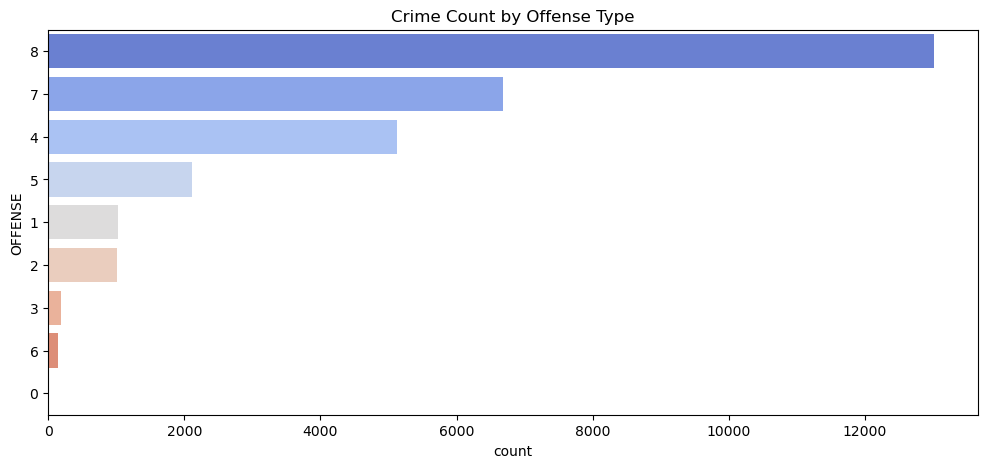

In [92]:
# --- Visualizations ---

# Distribution of OFFENSE Types
plt.figure(figsize=(12,5))
sns.countplot(y=df['OFFENSE'], order=df['OFFENSE'].value_counts().index, palette='coolwarm')
plt.title("Crime Count by Offense Type")
plt.show()

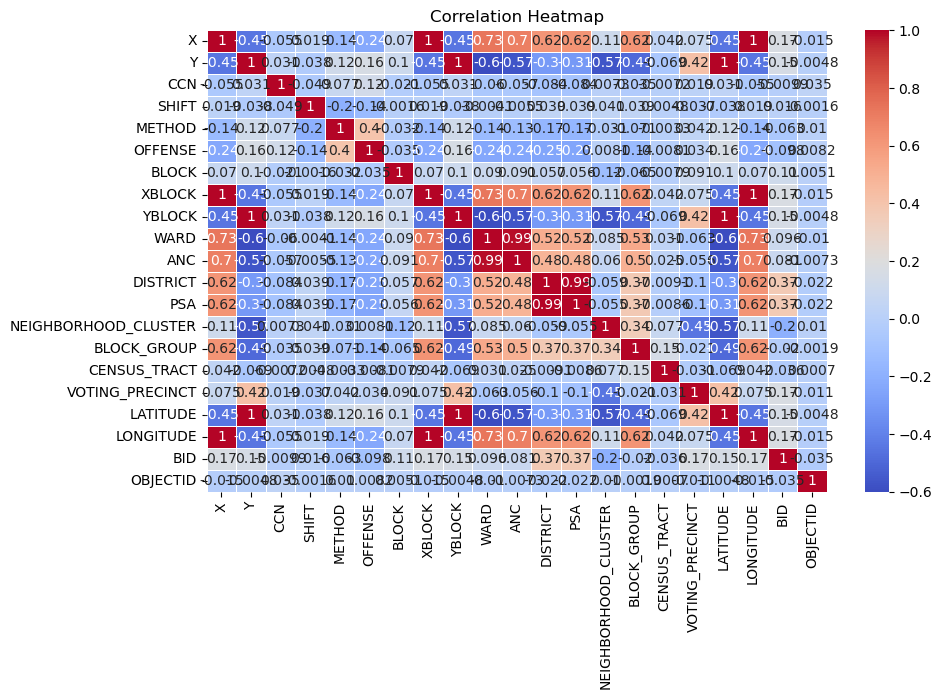

In [93]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Heatmap for Correlations
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

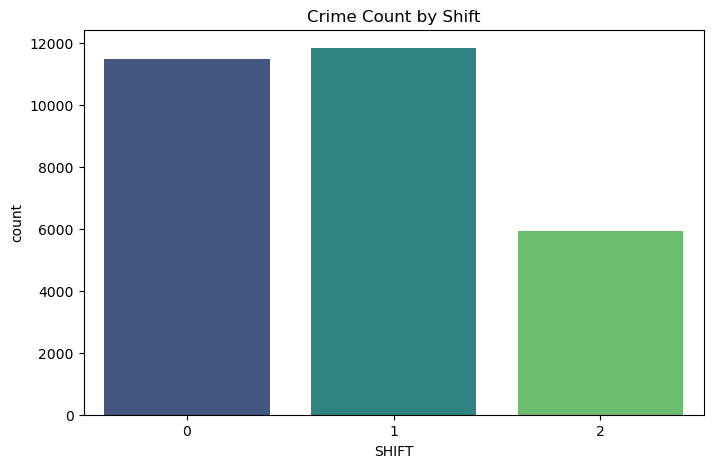

In [94]:
# Crime Count by SHIFT
plt.figure(figsize=(8,5))
sns.countplot(x=df['SHIFT'], palette='viridis')
plt.title("Crime Count by Shift")
plt.show()

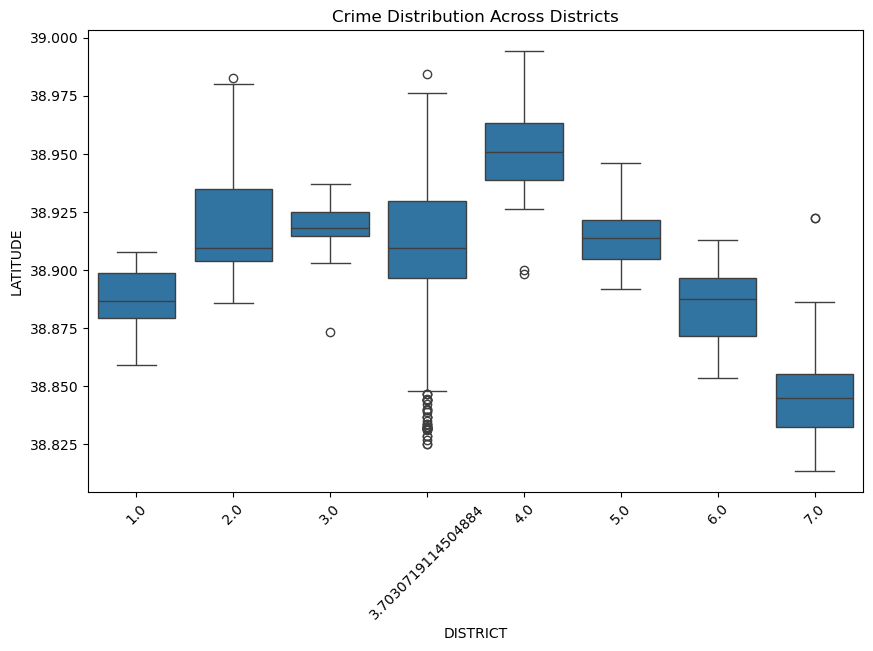

In [95]:
# Boxplot of Crimes by District
plt.figure(figsize=(10,6))
sns.boxplot(x='DISTRICT', y='LATITUDE', data=df)
plt.title("Crime Distribution Across Districts")
plt.xticks(rotation=45)
plt.show()

<Figure size 10000x11000 with 0 Axes>

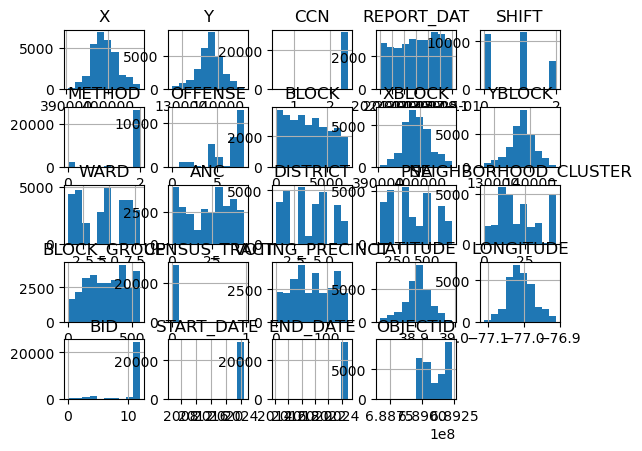

In [96]:
plt.figure(figsize = (100,110))
df.hist()
plt.show()

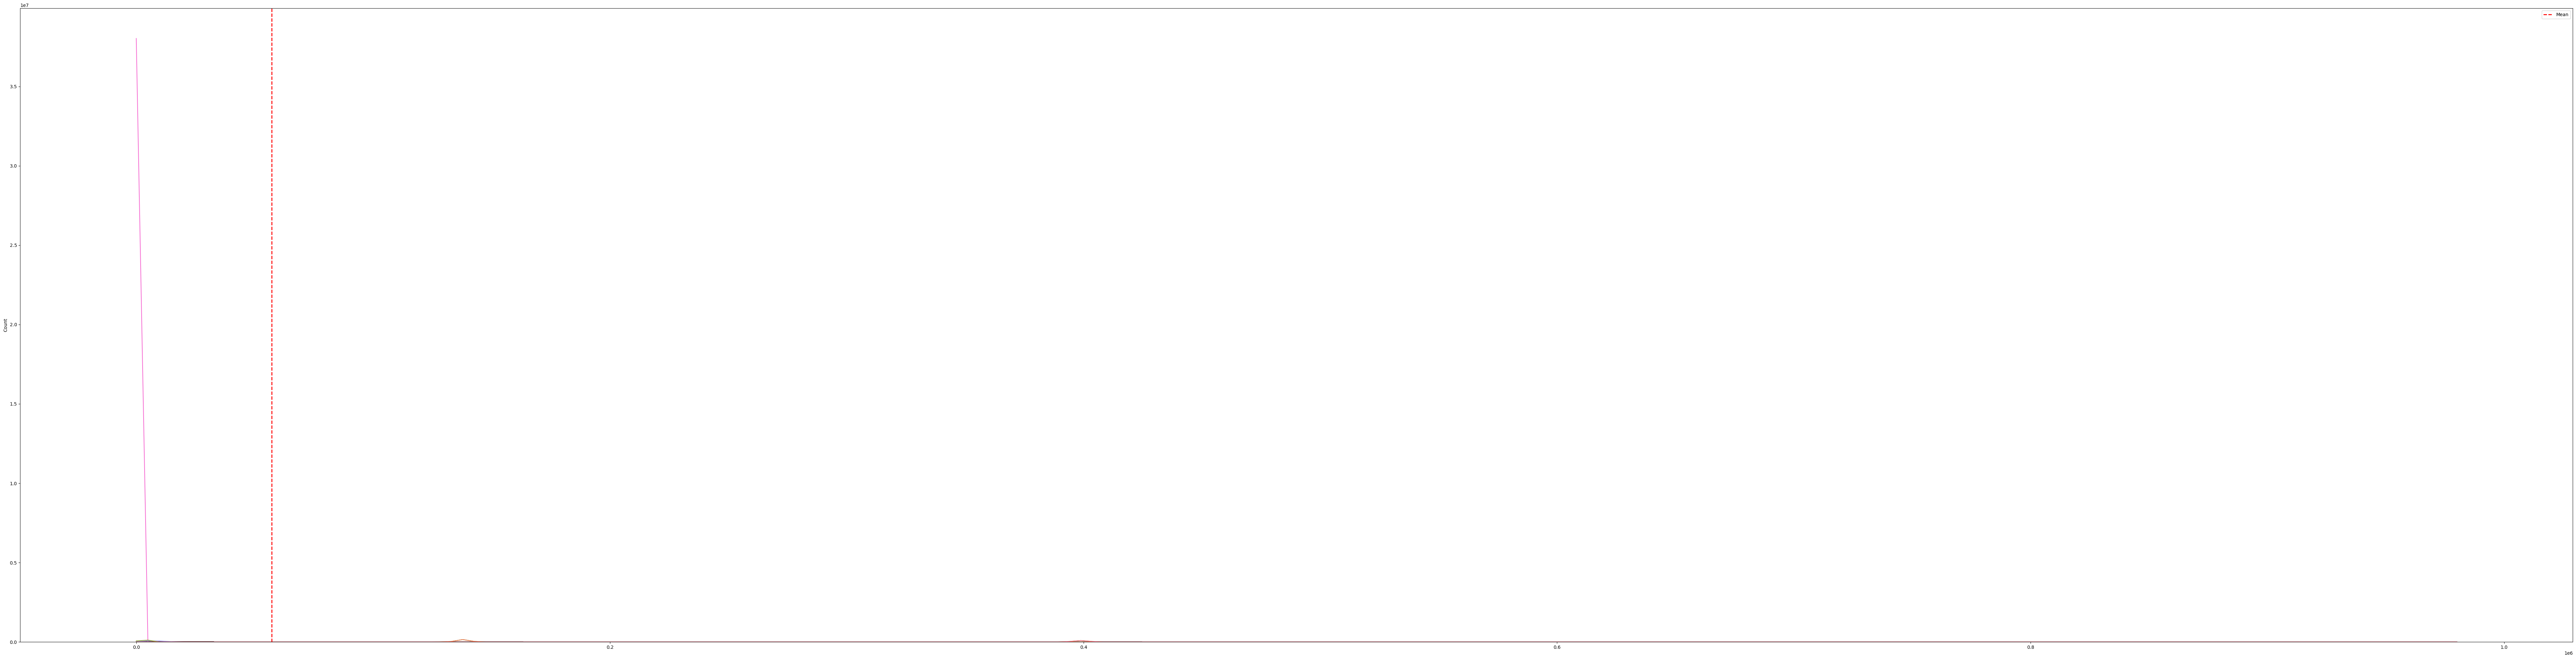

In [97]:
from scipy.stats import skew
unnecessary_columns = ["REPORT_DAT", "START_DATE", "END_DATE", "CCN", "OBJECTID"]
data = df.drop(columns=unnecessary_columns) 
skewness_value = skew(data)
plt.figure(figsize=(100,25))
sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.6)
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.legend()
plt.show()

In [98]:
unnecessary_columns = ["REPORT_DAT", "START_DATE", "END_DATE", "CCN", "OBJECTID"]
target_column = "METHOD"
X = df.drop(columns=unnecessary_columns + [target_column])  # Drop unnecessary + target column
y = df[target_column]


In [99]:
df["REPORT_YEAR"] = df["REPORT_DAT"].dt.year
df["REPORT_MONTH"] = df["REPORT_DAT"].dt.month
df["REPORT_DAY"] = df["REPORT_DAT"].dt.day


In [100]:
df = df.drop(columns=["REPORT_DAT", "START_DATE", "END_DATE"])


In [101]:
print(X.dtypes)


X                       float64
Y                       float64
SHIFT                     int32
OFFENSE                   int32
BLOCK                     int32
XBLOCK                  float64
YBLOCK                  float64
WARD                    float64
ANC                       int32
DISTRICT                float64
PSA                     float64
NEIGHBORHOOD_CLUSTER      int32
BLOCK_GROUP               int32
CENSUS_TRACT            float64
VOTING_PRECINCT           int32
LATITUDE                float64
LONGITUDE               float64
BID                       int32
dtype: object


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)